In [6]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import torchaudio
import librosa
import torchaudio.transforms as trans
from model import WaveNet

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import IPython.display
import numpy as np

In [8]:
audio,_ = librosa.load('./VCTK/p225/p225_001.wav',sr=16000,mono=True)
audio,_ = librosa.effects.trim(audio, top_db=10, frame_length=2048)
wav_tensor = torch.from_numpy(audio).unsqueeze(1)
wav_tensor = trans.MuLawEncoding()(wav_tensor).transpose(0,1)

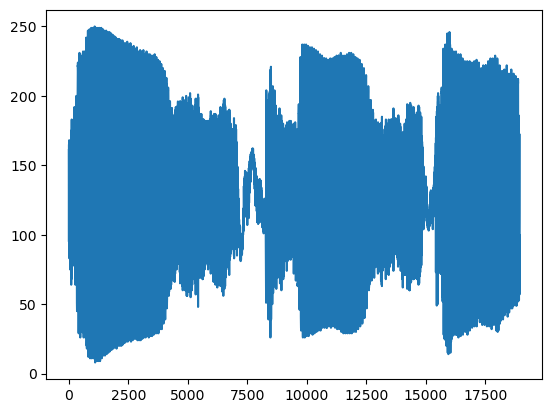

In [9]:
plt.plot(wav_tensor.numpy()[0])

In [15]:
model = WaveNet()
model.load_state_dict(torch.load('model.pth',map_location=torch.device('cpu')))

<All keys matched successfully>

In [14]:
recp_field=5116
sample_len = 16000*20

sample = Variable(wav_tensor[:,:recp_field])
for i in range(sample_len):
    logits = model(sample[:,-5116:])
    m = torch.distributions.Categorical(F.softmax(logits,dim=1).view(-1))
    new = m.sample()
    sample = torch.cat((sample,new),dim=1)
    
    if i % 16000 == 0:
        print (i)

RuntimeError: zero-dimensional tensor (at position 1) cannot be concatenated

In [ ]:
plt.plot(sample.cpu().data.numpy()[0])

In [ ]:
sample = trans.MuLawExpanding()(sample.cpu().data)
librosa.output.write_wav("sample.wav",sample.numpy()[0],sr=16000)